In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
# %matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

Text(0.5, 1.0, 'Undistorted Image')

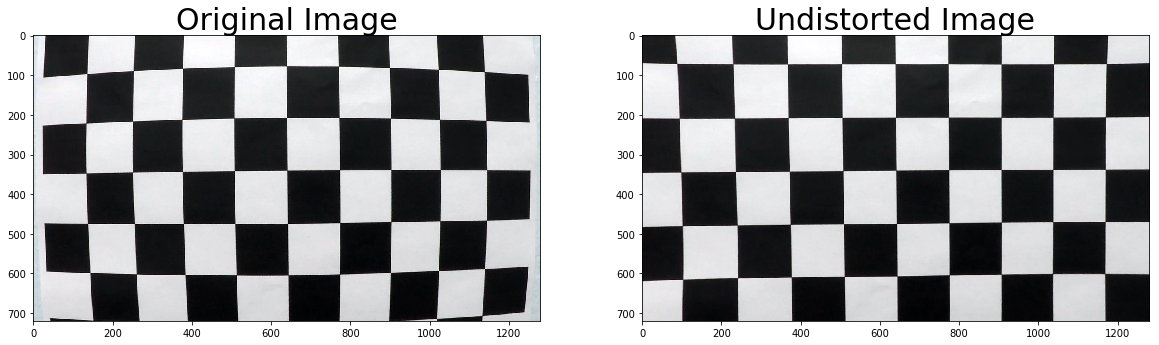

In [2]:
# img = cv2.imread("../Practice/test_image.jpg")   #不能用这张图片进行图片矫正，因为在12.01中 objp = np.zeros((6*8,3), np.float32)，矫正点的个数不相同
%matplotlib inline
import pickle

img = cv2.imread("../Practice/calibration1.jpg")
img_size = (img.shape[1],img.shape[0])

# ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)

# dst = cv2.undistort(img,mtx,dist,None,mtx)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# dist_pickle = {}
# dist_pickle["mtx"] = mtx
# dist_pickle["dist"] = dist

# print(img_size)

dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

[[  0 255 255 ..., 255 255   0]
 [  0 255 255 ..., 255 255   0]
 [  0 255   0 ...,   0 255   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0 255   0]
 [  0 255 255 ...,   0 255   0]]
(720, 1280, 3)


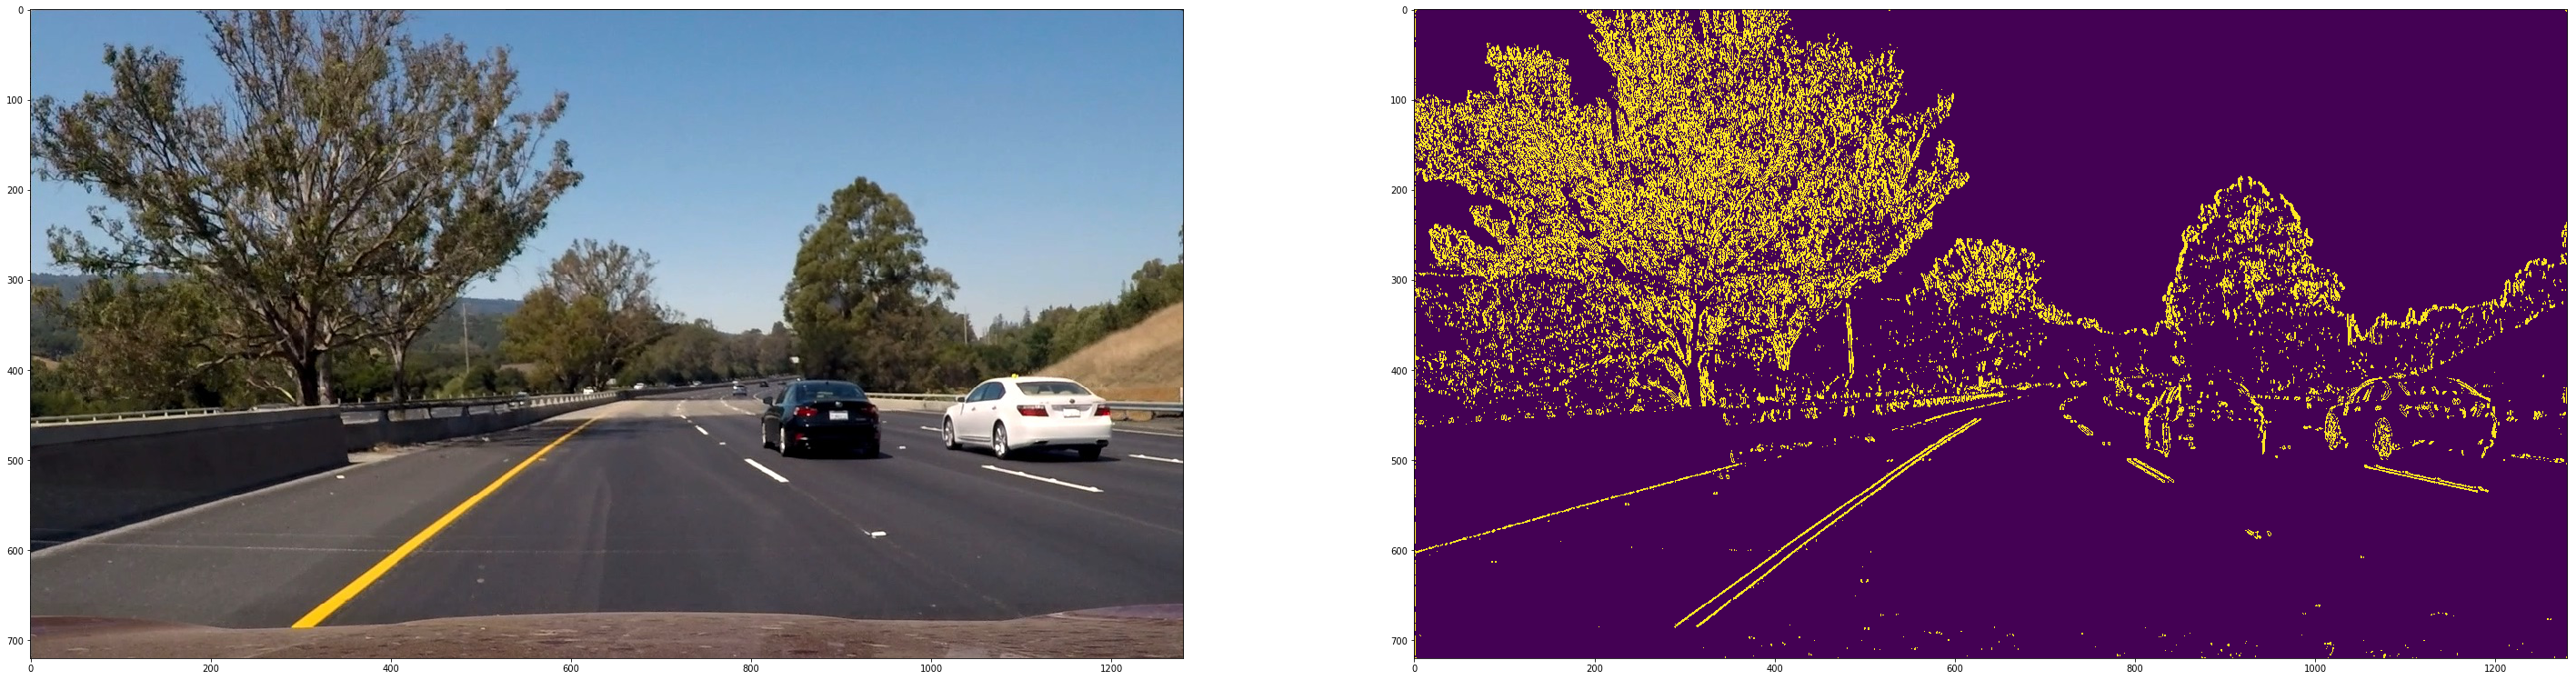

In [76]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img = mpimg.imread("../Practice/straight_lines1.jpg")
img = mpimg.imread("../Practice/test6.jpg")

def threshold_image(img,s_thresh = (170,255),Sob_thresh = (20,100)):
    img = np.copy(img)
    
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    
    l = hls[:,:,1]
    s = hls[:,:,2]
    
    sobelx = cv2.Sobel(l,cv2.CV_64F,1,0)
    abs_sobels = np.abs(sobelx)
    scaled_sobel = np.uint8(255*abs_sobels/np.max(abs_sobels))
    
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel>Sob_thresh[0])&(scaled_sobel<Sob_thresh[1])] = 1
    sbinary = np.zeros_like(l)
    sbinary[(sbinary>s_thresh[0])&(sbinary<s_thresh[1])] = 1
    
    
#     color_binary = np.dstack((np.zeros_like(sxbinary),sxbinary,sbinary))*255   #generate the color image
    combined_binary = np.zeros_like(sxbinary)
#     combined_binary[(sxbinary == 1)|(sbinary == 1)] = 1
    combined_binary[(sxbinary == 1)|(sbinary == 1)] = 255
    return combined_binary

result = threshold_image(img)
f,(ax1,ax2) = plt.subplots(1,2,figsize = (50,25))
ax1.imshow(img)
ax2.imshow(result)
print(result)

print(img.shape)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


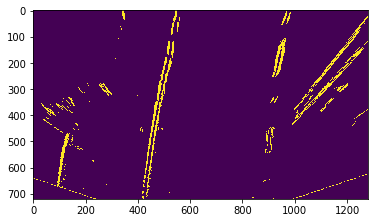

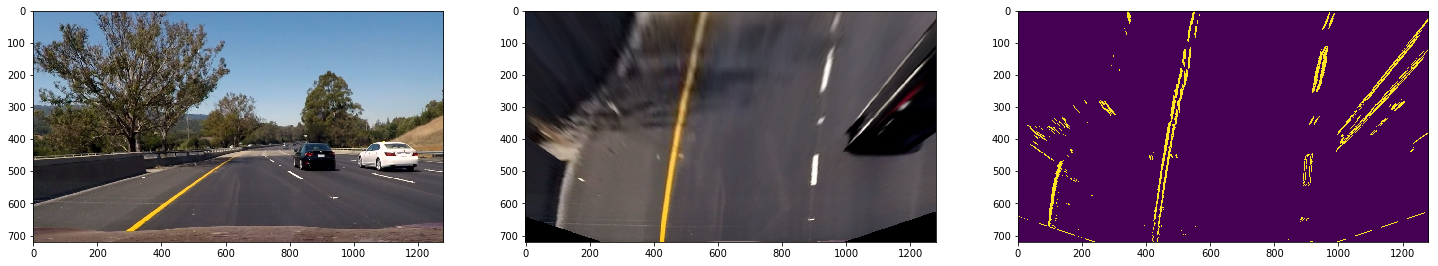

In [77]:
# %matplotlib qt
%matplotlib inline
img = mpimg.imread("../Practice/test6.jpg")
def warped_image(img):
    img_size = (img.shape[1],img.shape[0])
#     plt.imshow(img)
    src = np.float32([[576.475,460.555],
                      [705.625,460.555],
                      [1038.31,674.427],
                      [271.681,674.427]])
    
    dst = np.float32([[400,100],
                      [850,100],
                      [850,720],
                      [400,720]])
    
    M = cv2.getPerspectiveTransform(src,dst)
    
    Warp = cv2.warpPerspective(img,M,img_size,flags = cv2.INTER_LINEAR)   #注意和7.18第一个cell中的第50行比较
    return Warp


# aa = warped_image(img)
warped_result = warped_image(img)
binary_image = threshold_image(warped_result)
plt.imshow(binary_image)
print(binary_image)
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (25,9))
ax1.imshow(img)
ax2.imshow(warped_result)
ax3.imshow(binary_image)


# plt.imshow(img)
# plt.plot(576.475,460.555,".")
# plt.plot(705.625,460.555,".")
# plt.plot(1038.31,674.427,".")
# plt.plot(271.681,674.427,".")

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob 
import cv2

# plt.imshow(bb)
w_wide = 50
w_height = 80
margin = 100

# image = mpimg.imread("../Practice/straight_lines1.jpg")
# result = threshold_image(image)
# warped_result = warped_image(result)
# plt.imshow(warped_result)
# warped = mpimg.imread('warped_example.jpg')
# bb = mpimg.imread("Figure_2.jpg")
def find_w_centre(image,w_wide,w_height,margin):
    w_center = []
    window = np.ones(w_wide)
    
    l_sum = np.sum(image[int(3*image.shape[0]/4):,int(image.shape[1]/2):],axis = 0)
    print(image)
    print(l_sum)
    l_center = np.argmax(np.convolve(window,l_sum)) - w_wide/2
    
    r_sum = np.sum(image[int(3*image.shape[0]/4):,:int(image.shape[1]/2)],axis = 0)
    r_center = np.argmax(np.convolve(window,r_sum)) + int(image.shape[1]/2)- w_wide/2

    w_center.append((l_center,r_center))
#     print(w_center)
    w_num = int(image.shape[0] /w_height)
    
    for i in range(1,w_num):
        pix_under = np.sum(image[int(image.shape[0]-w_height*(i+1)):int(image.shape[0]-w_height*i),:],axis = 0)
        print(pix_under)
        r_convolve = np.convolve(window,pix_under)
        print(i,r_convolve)
        l_center = np.argmax(r_convolve[int(l_center+w_wide/2-margin):int(l_center+w_wide/2+margin)]) + int(l_center+w_wide/2-margin) - w_wide/2
        r_center = np.argmax(r_convolve[int(r_center+w_wide/2-margin):int(r_center+w_wide/2+margin)]) + int(r_center+w_wide/2-margin) - w_wide/2 

        w_center.append((l_center,r_center))
        
        
    return w_center

window_centroids = find_w_centre(binary_image,w_wide,w_height,margin)
# window_centroids = find_w_centre(warped,w_wide,w_height,margin)
print(window_centroids)
def points_data(window_centroids,img_ref):
    leftx = []
    lefty = []
    rightx = []
    righty = []
    for i in range(len(window_centroids)):
#     a = np.mean(int(img_ref.shape[0]-(i+1)*80):int(img_ref.shape[0]-i*80))
        a = (int(img_ref.shape[0]-(i+1)*80)+int(img_ref.shape[0]-i*80)) / 2 
        
        leftx.append(window_centroids[i][0])
        rightx.append(window_centroids[i][1])
        lefty.append(a)
        righty.append(a)
    
    return leftx, lefty, rightx, righty

def ploy_fit(img):
    
    leftx,lefty,rightx,righty = points_data(window_centroids,img)
    
    left_fit = np.polyfit(lefty,leftx,2)
    right_fit = np.polyfit(righty,rightx,2)
    ploy = np.linspace(0,img.shape[0]-1,img.shape[0])
    
    left_fitx = ploy**2*left_fit[0] + ploy*left_fit[1] + left_fit[2]
    right_fitx = ploy**2*right_fit[0] + ploy*right_fit[1] + right_fit[2]
    
    plt.plot(left_fitx,ploy)
    plt.plot(right_fitx,ploy)
    
    return img


# find_w_centre(bb,50,80,100)

cc = ploy_fit(binary_image)
plt.imshow(cc)

# cc = ploy_fit(warped)
# plt.imshow(cc)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  255    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 

ValueError: attempt to get argmax of an empty sequence

[[255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 [255 255 255 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0   274    39    12    24    27    12    33   783
  1609  3870  7446 11987 16546 19852 21114 22134 23408 23891 23936 22653
 21900 19349 17325 15299 13506 12001 11219  8696  6408  5909  4144  2334
  2843  2351  1839  2616  2093  1830  2090  2596  2838  2585  2589  2593
  2601  2340  2097  2587  1798  1291  1299  1548  1301  1539  1031  2053
  1293  1550  1553  1554  1287   539  1042   786  1026  1044   780  1030
   790  1278   533   527  1029   525   266   268     9    13     8     9
     6     7    13     7     8   266   258     4   279   542  1042   5

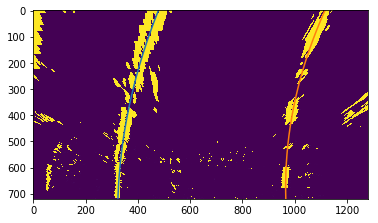

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2
# %matplotlib qt
# Read in a thresholded image
warped = mpimg.imread('warped_example.jpg')
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

# def window_mask(width, height, img_ref, center,level):
#     output = np.zeros_like(img_ref)
#     output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
# #     output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),int(center-width/2):int(center+width/2)] = 1
#     return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
#     print(window)
    l_sum = np.sum(image[int(3*image.shape[0]/4):,:int(image.shape[1]/2)], axis=0)
    print(image)
    print(l_sum)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    
    r_sum = np.sum(image[int(3*image.shape[0]/4):,int(image.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(image.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(image.shape[0]/window_height)):
	    # convolve the window into the vertical slice of the image
	    image_layer = np.sum(image[int(image.shape[0]-(level+1)*window_height):int(image.shape[0]-level*window_height),:], axis=0)
	    print("38",image_layer)
	    conv_signal = np.convolve(window, image_layer)
# 	    print(image_layer)
# 	    print("**************")
# 	    print(level,conv_signal)
	    # Find the best left centroid by using past left center as a reference
	    # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
	    offset = window_width/2
# 	    l_min_index = int(max(l_center+offset-margin,0))
	    l_min_index = int(l_center+offset-margin)
# 	    print("49",l_min_index)    
# 	    l_max_index = int(min(l_center+offset+margin,image.shape[1]))
	    l_max_index = int(l_center+offset+margin)
	    l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
	    # Find the best right centroid by using past right center as a reference
# 	    r_min_index = int(max(r_center+offset-margin,0))
	    r_min_index = int(r_center+offset-margin)
# 	    r_max_index = int(min(r_center+offset+margin,image.shape[1]))
	    r_max_index = int(r_center+offset+margin)
	    r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
	    # Add what we found for that layer
	    window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

def points_data(window_centroids,img_ref):
    leftx = []
    lefty = []
    rightx = []
    righty = []
    for i in range(len(window_centroids)):
#     a = np.mean(int(img_ref.shape[0]-(i+1)*80):int(img_ref.shape[0]-i*80))
        a = (int(img_ref.shape[0]-(i+1)*80)+int(img_ref.shape[0]-i*80)) / 2 
        
        leftx.append(window_centroids[i][0])
        rightx.append(window_centroids[i][1])
        lefty.append(a)
        righty.append(a)
    
    return leftx, lefty, rightx, righty
    
leftx, lefty, rightx, righty = points_data(window_centroids,warped)

print(leftx, lefty)

def plot_fit(img):
    leftx, lefty, rightx, righty = points_data(window_centroids,img)
    left_fit = np.polyfit(lefty,leftx,2)
    right_fit = np.polyfit(righty,rightx,2)
    
    ploty = np.linspace(0,img.shape[0]-1,img.shape[0])
    print(img.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
#     ploty = ploty[::-1]
    plt.plot(left_fitx,ploty)
    plt.plot(right_fitx,ploty)
    
    
    return img

aa = plot_fit(warped)
plt.imshow(aa)
